### Instructions:

1. Import all the libraries you need in the cell below
2. Create as many cells as needed to answer a question
  * Group code that is logically related in the same cell
  * Keep cells relatively small
  * Format long statements or expressions, including `ggplot`, across multiple lines
3. Submit your work to Github
  * Folder should be called `week_4_practical`
  * This file should be called `week_4_solution.ipynb`
    

In [1]:
library(ggplot2 )
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



### Q.1

* Write a function that manually computes the standard deviation.
  * Call your function `sd_x`

Recall that the standard deviation is computed as

$$
\sigma = \sqrt{\frac{\sum{(x_i - \mu)^2}}{N-1}}
$$

* $\mu$ is simply the mean of the vector of inputs
  * it can be computed using the `mean` function


For example, given:

```x = c(1,2,3)```

Since $\mu = 2$, then $\sigma = \sqrt{\frac{(1-2)^2 + (2-2)^2 + (3-2)^2}{3}} = 1$.

* Important: What do you do if this function is called with a single element?
  * Recall that we cannot compute the std deviation of a single value

* Use `assertthat` to make sure that `sd_x` and `sd` return the same values for 3 test vectors of your choice.

In [38]:
d = c(1,2,3)
m = mean(d)
print(m)

squared = (d-m)^2
print(squared)

sum_square = sum(squared)
print(sum_square)

normalize = sum_square/(length(d)-1)
print(normalize)

sqrt(normalize)

[1] 2
[1] 1 0 1
[1] 2
[1] 1


[1] 1

In [28]:
sd_x = function(d){
    
    m = mean(d)
    squared = (d-m)^2
    sum_square = sum(squared)
    normalize = sum_square/(length(d)-1)
    sqrt(normalize)
}

In [36]:
# Write you answer here and use more cell if needed
data = c(1,2,3)
sd(data)
sd_x(data)
assert_that(sd_x(data) == sd(data))

[1] 1

[1] 1

[1] TRUE

### Q2

* In this question, we will build a simulated dataset for healthy and diseased corals.  You will be creating a `tibble` called `coral_health_tbl` that contains 2 columns:

1. A column called `coral`. Generate this column by sampling 100 coral species from the following values
```
coral_pop = c("Montipora capitata",
                 "Porites compressa",
                 "Porites lobata")
```
 * You can use the function `sample` to select 100 values from the vector `coral_pop`
 
2. The second column is called `health_status`.
    * it represents 100 randomly selected `TRUE` or `FALSE` values that represent whether the coral is healthy or diseased.
    * Healthy corals (`health_status == FALSE`; not diseased) occur with a probability of 0.8 wheras diseased (`health_status == TRUE`) corals occur with a probability of 0.2.
    * You can use sample again but modify the `prob` parameter to account for the differet probabilities


In [62]:
?sample

In [61]:
# three col = selection of coral pop generate 100 values
# number after , is # of values you want selected
coral_pop = sample(c("Montipora capitata", "Porites compressa", "Porites lobata"), 100, replace = TRUE)

In [62]:
health_status = sample(c(TRUE, FALSE), 100, replace = TRUE, prob = c(0.2, 0.8))
print(health_status)

  [1] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE
 [37] FALSE  TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
 [73] FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
 [97]  TRUE FALSE  TRUE FALSE


In [63]:
coral_df = data.frame(coral_pop, health_status)

In [64]:
coral_health_tbl = as_tibble(coral_df)
print(coral_health_tbl)

# A tibble: 100 x 2
   coral_pop          health_status
   <fct>              <lgl>        
 1 Montipora capitata FALSE        
 2 Montipora capitata FALSE        
 3 Montipora capitata FALSE        
 4 Porites lobata     FALSE        
 5 Porites compressa  FALSE        
 6 Porites compressa  FALSE        
 7 Porites compressa  TRUE         
 8 Porites compressa  FALSE        
 9 Montipora capitata TRUE         
10 Porites compressa  FALSE        
# ... with 90 more rows


### Q3

* Create a new column in `coral_health_tbl` called `coral_cover`
* This column represents coral cover values for the corals observed in your tibble

* For the healthy coral (`health_status = TRUE`), sample the cover values from a normal with mean 9 and std of 2
* For the diseased corals (`health_status = FALSE`), sample the cover values from a normal with mean 1 and std of 3
* Note that this is a perfect scenario for using `mapply`

In [65]:
rnorm(1, mean=9, sd=2)

[1] 7.65559

In [66]:
return_cover = function(x){
    if(x == TRUE){
        rnorm(1, mean=1, sd=3)
    }else{ 
        rnorm(1, mean=9, sd=2)
    }
    
}

In [67]:
#test
return_cover(FALSE)

[1] 9.446979

In [68]:
#test
return_cover(FALSE)
return_cover(FALSE)
return_cover(TRUE)
return_cover(FALSE)

[1] 11.64088

[1] 11.2881

[1] 0.6369183

[1] 9.653526

In [69]:
## test 
head(coral_health_tbl)

coral_pop,health_status
Montipora capitata,FALSE
Montipora capitata,FALSE
Montipora capitata,FALSE
Porites lobata,FALSE
Porites compressa,FALSE
Porites compressa,FALSE


In [70]:
coral_cover = mapply(return_cover, health_status)

In [71]:
coral_df$coral_cover = coral_cover
print(coral_df)

             coral_pop health_status coral_cover
1   Montipora capitata         FALSE   6.3609186
2   Montipora capitata         FALSE   8.7965813
3   Montipora capitata         FALSE   9.9642444
4       Porites lobata         FALSE   8.2921277
5    Porites compressa         FALSE   8.0920480
6    Porites compressa         FALSE   7.7495577
7    Porites compressa          TRUE   2.8301882
8    Porites compressa         FALSE  10.3462631
9   Montipora capitata          TRUE   1.1340278
10   Porites compressa         FALSE  10.3209686
11      Porites lobata         FALSE   9.8222496
12   Porites compressa         FALSE   5.7274772
13  Montipora capitata         FALSE  10.0436281
14   Porites compressa         FALSE  13.5279271
15      Porites lobata         FALSE  11.9059285
16   Porites compressa         FALSE  12.5133822
17  Montipora capitata         FALSE  11.0701045
18  Montipora capitata         FALSE   6.5567679
19      Porites lobata         FALSE   8.0886061
20  Montipora capita

### Q4

* Add another column called `binary_health_status`.
 * set the column to 0 if `health_status == FALSE`
 * set the column to 1 if `health_status == TRUE`

* A trick here is to remember that:
  1. Corecing (converting) a logical can be done with `as.integer()`
  2. `as.integer(TRUE)` returns 1
  3. `as.integer(FALSE)` returns 0




In [72]:
binary_health_return = function(x){
    if( x == TRUE){
        as.integer(TRUE)
    }else{ 
        as.integer(FALSE)
    }
    
}

In [73]:
binary_health_status = mapply(binary_health_return, health_status)

In [74]:
coral_df$binary_health_status = binary_health_status
print(coral_df)

             coral_pop health_status coral_cover binary_health_status
1   Montipora capitata         FALSE   6.3609186                    0
2   Montipora capitata         FALSE   8.7965813                    0
3   Montipora capitata         FALSE   9.9642444                    0
4       Porites lobata         FALSE   8.2921277                    0
5    Porites compressa         FALSE   8.0920480                    0
6    Porites compressa         FALSE   7.7495577                    0
7    Porites compressa          TRUE   2.8301882                    1
8    Porites compressa         FALSE  10.3462631                    0
9   Montipora capitata          TRUE   1.1340278                    1
10   Porites compressa         FALSE  10.3209686                    0
11      Porites lobata         FALSE   9.8222496                    0
12   Porites compressa         FALSE   5.7274772                    0
13  Montipora capitata         FALSE  10.0436281                    0
14   Porites compres

### Q5

* Plot the distribution of `coral_cover` for healthy versus diseased corals
* Note that I am using a histogram `geom`
  * Histograms need only a `x` axis because the `y` is computed (count)
    * However, instead of a raw count, we want a normalized count. You can normalize the count by setting `y = stat(count / sum(count))`  
  * I am coloring the bin outlines in black and filling in grey for disease and white for healthy
  * I am using `binwidth=1'.
* use the `labs` function to add a title and to change the labels for the `x` and `y` axes
* The plot should look like the following
![](https://www.dropbox.com/s/wdbdj05rd50vb0k/healthy-diseased.png?dl=1)

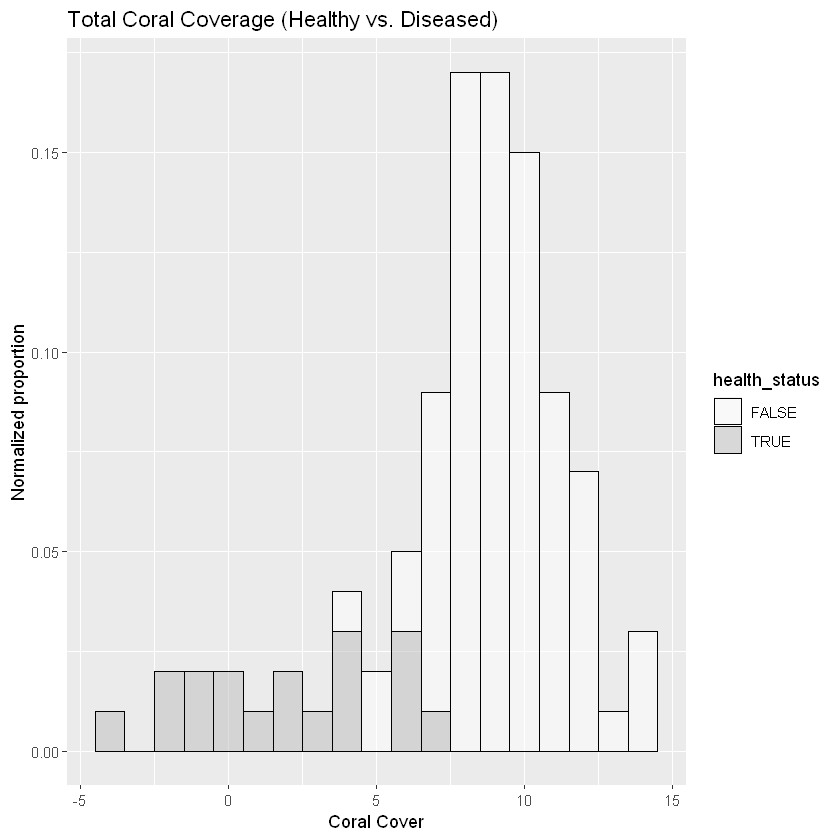

In [83]:
ggplot(coral_df, aes(x = coral_cover, y = stat(count / sum(count)))) + 
    geom_histogram(color = "black", 
                   binwidth = 1,
                   alpha = .5,
                   aes(coral_cover, fill = health_status)) +
                scale_fill_manual(values = c("white", "grey")) +
    labs(title = "Total Coral Coverage (Healthy vs. Diseased)", x = "Coral Cover", y = "Normalized proportion")

### Q6.

* Repeat the plot above by highlighting the distribution per species
* I am using `geom_density`
  * set the `adjust` param of `geom_density` to `2`
* Change the `xlim` scale so that we can see the edges of the curves
  * I.e., curves should not be cutoff


In [96]:
#this code follows the same format as the previous graph, but with geom density. 
#However, if I include the aes(x=, y=) in the ggplot line then I get an traceback error message for the xlim line. Why is that? 
ggplot(coral_df, aes(x = coral_cover, y = stat(count / sum(count))) +
    geom_density(color = "black", 
               fill = coral_pop,
               alpha = 0.2, 
               adjust = 2) +
    scale_fill_manual(values = c("white", "blue", "red")) +
    labs(x = "Coral Cover", y = "Density", title = "Total coral coverage per species") +
    xlim(-10, 20)

ERROR: Error in parse(text = x, srcfile = src): <text>:11:0: unexpected end of input
9:     labs(x = "Coral Cover", y = "Density", title = "Total coral coverage per species") +
10:     xlim(-10, 20)
   ^


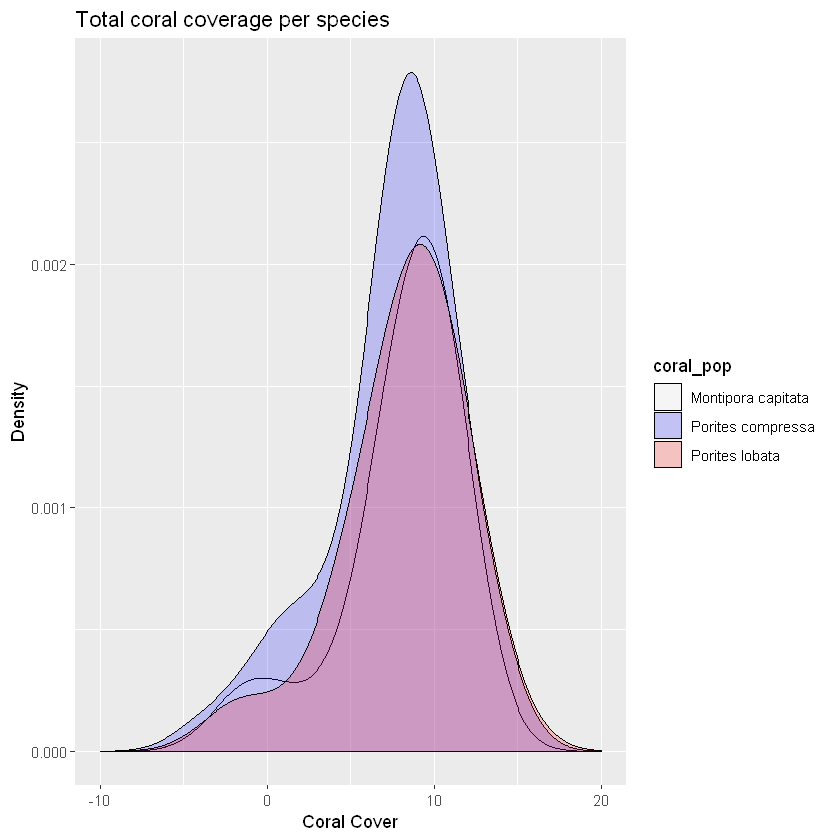

In [97]:
ggplot(coral_df) +
    geom_density(aes(x = coral_cover, y = stat(count / sum(count)), 
                fill = coral_pop), 
                color = "black", 
                alpha = 0.2, 
                adjust = 2) +
    scale_fill_manual(values = c("white", "blue", "red")) +
    labs(x = "Coral Cover", y = "Density", title = "Total coral coverage per species") +
    xlim(-10, 20)

### Q6 -- Challenge


Recall problem `8` in the airquality dataset.
  * Remember that you can import that dataset using `data(airquality)`
1. Convert the `airquality` dataframe to a tibble called `airq_tbl`
2. Replace the missing values for Solar.R using that month's average.
    * Example:
        * The missing value for line 6 in `airq_tbl`should be replaced with the average for month 5.
        * The missing value for line 97 in `airq_tbl` should be replaced with the average for month 8.

* Strategy:
  1. Compute the average values for months 5, 6, 7, 8, and 9 in a names vector called `monthly_avg_SolarR`
      * monthly_avg_SolarR[5] should return the average for May.
      * monthly_avg_SolarR[6] should return the average for June.
      * etc.
      * This is an ideal use case for `mapply` with `na.rm=TRUE` (ask me!)
  2. for each line of airq_tbl check value of Solar.R and do:
    * if value is not `na`, return the value
    * if value if `na`; return avg associated with `Month`
    * This is an ideal case for `apply`
      * You need to write your own function (call it `fix_missing_solar_R`)
      * Recall that the argument to that function is a complete row as a vector!
    * test your function with the following line to make sure it's working
    ```fix_missing_solar_R(airq_tbl[5,])```

In [101]:
data(airquality)
airq_tbl = as_tibble(airquality)
head(airq_tbl)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


In [118]:
#had trouble getting mapply to work, tapply gave me the same results
monthly_avg_SolarR = tapply(airq_tbl$Solar.R, airq_tbl$Month, mean, na.rm=TRUE)
monthly_avg_SolarR[as.character(5)]
monthly_avg_SolarR[as.character(6)]
monthly_avg_SolarR[as.character(7)]
monthly_avg_SolarR[as.character(8)]
monthly_avg_SolarR[as.character(9)]

5 
181.2963

6 
190.1667

7 
216.4839

8 
171.8571

9 
167.4333

In [130]:
monthly_avg_SolarR = tapply(airq_tbl$Solar.R, airq_tbl$Month, mean, na.rm=TRUE)

fix_missing_solar_R = function(x){
    
    if(is.na(x["Solar.R"])){
        monthly_avg_SolarR[as.character(x["Month"])]
    }else{
        x["Solar.R"]
    }   
}

## I don't understand why these are returning values in different formats and not the correct averages
fix_missing_solar_R(airq_tbl[5,])
fix_missing_solar_R(airq_tbl[6,])
fix_missing_solar_R(airq_tbl[7,])
fix_missing_solar_R(airq_tbl[8,])
fix_missing_solar_R(airq_tbl[9,])

5 
181.2963

5 
181.2963

Solar.R
299


Solar.R
99


Solar.R
19


In [134]:
# not sure why only getting first month value change and no display of all the other months 
SolarR_fixed = apply(airq_tbl, 1, fix_missing_solar_R)
SolarR_fixed

[1] 190.0000 118.0000 149.0000 313.0000 181.2963 181.2963 299.0000  99.0000
  [9]  19.0000 194.0000 181.2963 256.0000 290.0000 274.0000  65.0000 334.0000
 [17] 307.0000  78.0000 322.0000  44.0000   8.0000 320.0000  25.0000  92.0000
 [25]  66.0000 266.0000 181.2963  13.0000 252.0000 223.0000 279.0000 286.0000
 [33] 287.0000 242.0000 186.0000 220.0000 264.0000 127.0000 273.0000 291.0000
 [41] 323.0000 259.0000 250.0000 148.0000 332.0000 322.0000 191.0000 284.0000
 [49]  37.0000 120.0000 137.0000 150.0000  59.0000  91.0000 250.0000 135.0000
 [57] 127.0000  47.0000  98.0000  31.0000 138.0000 269.0000 248.0000 236.0000
 [65] 101.0000 175.0000 314.0000 276.0000 267.0000 272.0000 175.0000 139.0000
 [73] 264.0000 175.0000 291.0000  48.0000 260.0000 274.0000 285.0000 187.0000
 [81] 220.0000   7.0000 258.0000 295.0000 294.0000 223.0000  81.0000  82.0000
 [89] 213.0000 275.0000 253.0000 254.0000  83.0000  24.0000  77.0000 171.8571
 [97] 171.8571 171.8571 255.0000 229.0000 207.0000 222.0000 137.0000 192.0000
[105] 273.0000 157.0000  64.0000  71.0000  51.0000 115.0000 244.0000 190.0000
[113] 259.0000  36.0000 255.0000 212.0000 238.0000 215.0000 153.0000 203.0000
[121] 225.0000 237.0000 188.0000 167.0000 197.0000 183.0000 189.0000  95.0000
[129]  92.0000 252.0000 220.0000 230.0000 259.0000 236.0000 259.0000 238.0000
[137]  24.0000 112.0000 237.0000 224.0000  27.0000 238.0000 201.0000 238.0000
[145]  14.0000 139.0000  49.0000  20.0000 193.0000 145.0000 191.0000 131.0000
[153] 223.0000